In [ ]:
import pandas as pd
import numpy as np



In [ ]:
df = pd.read_csv("/content/cardata.csv")


In [ ]:
df.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
df.isnull().sum()


Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df.dropna(inplace=True)


In [ ]:
df.drop_duplicates(inplace=True)


In [ ]:
df.size

2691

In [ ]:
df.shape

(299, 9)

In [ ]:
df.dtypes


Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object

In [ ]:
df.to_csv("cleaned_car_data.csv", index=False)


In [ ]:
freq_dist = df['Transmission'].value_counts()
freq_dist

Manual       260
Automatic     39
Name: Transmission, dtype: int64

In [ ]:
freq_dist = df['Seller_Type'].value_counts()
freq_dist

Dealer        193
Individual    106
Name: Seller_Type, dtype: int64

In [ ]:
freq_dist = df['Fuel_Type'].value_counts()
freq_dist

Petrol    239
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
freq_dist = df['Year'].value_counts()
freq_dist

2015    60
2016    49
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64

In [ ]:
mode = df['Year'].mode()
mode

0    2015
dtype: int64

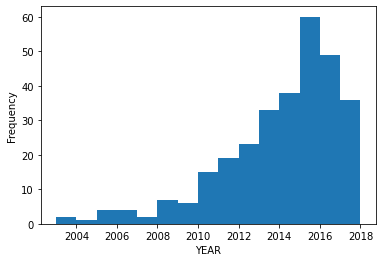

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df['Year'], bins=15)
plt.xlabel('YEAR')
plt.ylabel('Frequency')
plt.show()


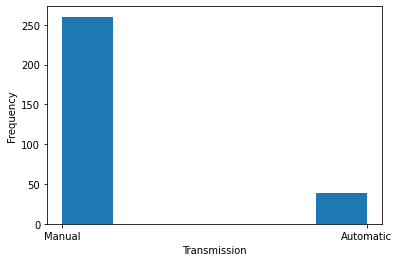

In [ ]:
plt.hist(df['Transmission'], bins=6)
plt.xlabel('Transmission')
plt.ylabel('Frequency')
plt.show()

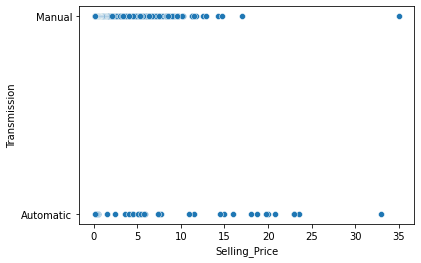

In [ ]:
import seaborn as sns

sns.scatterplot(y='Transmission', x='Selling_Price', data=df)
plt.show()


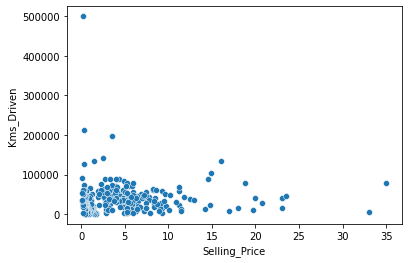

In [ ]:
sns.scatterplot(y='Kms_Driven', x='Selling_Price', data=df)
plt.show()

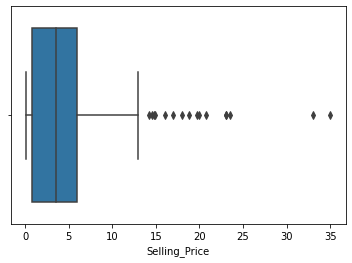

In [ ]:
sns.boxplot(x='Selling_Price', data=df)
plt.show()

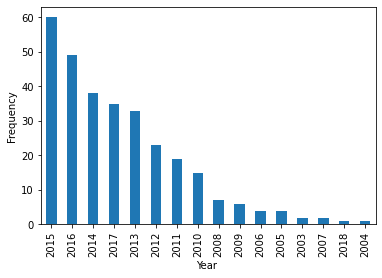

In [ ]:
import matplotlib.pyplot as plt

df['Year'].value_counts().plot(kind='bar')
plt.xlabel('Year ')
plt.ylabel('Frequency')
plt.show()

In [ ]:

# Calculate the correlation matrix
corr_matrix = df.corr()

# Print the correlation matrix
print(corr_matrix)

# Get the correlation coefficient between two columns
# corr_coeff = df['column1'].corr(df['column2'])
# print('Correlation coefficient between column1 and column2:', corr_coeff)

                   Year  Selling_Price  Present_Price  Kms_Driven     Owner
Year           1.000000       0.234369      -0.053563   -0.525714 -0.181639
Selling_Price  0.234369       1.000000       0.876378    0.028566 -0.087880
Present_Price -0.053563       0.876378       1.000000    0.205253  0.009947
Kms_Driven    -0.525714       0.028566       0.205253    1.000000  0.089367
Owner         -0.181639      -0.087880       0.009947    0.089367  1.000000


#**The correlation analysis shows the correlation coefficients between the variables in the data.**

Year has a weak positive correlation with Selling_Price(0.234) and a weak negative correlation with Kms_Driven(-0.526), indicating that ***newer cars tend to have higher selling prices and lower mileage***.

Selling_Price has a strong positive correlation with Present_Price, indicating that the **selling price is heavily influenced by the current market price of the car**.

Kms_Driven has a weak positive correlation with Present_Price, indicating that ***higher-priced cars tend to have higher mileage***.

Owner has a weak positive correlation with Kms_Driven, indicating that **cars with more owners tend to have higher mileage**. However, it has a weak negative correlation with Selling_Price, indicating that **cars with more owners tend to have lower selling prices**.

In [ ]:

from sklearn.linear_model import LinearRegression


# create X and y arrays
X = df[['Year', 'Present_Price', 'Kms_Driven']]
y = df['Selling_Price']

# create a linear regression object
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# print the coefficient and intercept
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)


Coefficient: [ 4.77576107e-01  5.19521195e-01 -1.12604589e-06]
Intercept: -960.9411232911144


##Based on the coefficients and intercept values, the linear regression model with the "Owner" variable removed can be represented as:

Selling_Price = 0.477576107 * Year + 0.519521195 * Present_Price - 1.12604589e-06

This means that for every one unit increase in the Year variable, the Selling_Price is expected to increase by 0.477576107 units, holding all other variables constant. Similarly, for every one unit increase in the Present_Price variable, the Selling_Price is expected to increase by 0.519521195 units, holding all other variables constant.

The intercept value of -960.9411232911144 represents the expected Selling_Price when all the independent variables are equal to zero (which is not a realistic scenario in this case).

However, it's important to note that linear regression assumes a linear relationship between the independent and dependent variables, which may not always be the case in real-world scenarios. In such cases, polynomial regression or other non-linear regression techniques may be more appropriate.

In [ ]:
# create X and y arrays
X = df[['Year', 'Present_Price', 'Kms_Driven', 'Owner', 'Fuel_Type', 'Seller_Type', 'Transmission']]
y = df['Selling_Price']

# create dummy variables for categorical variables
X = pd.get_dummies(X, drop_first=True)

# create a linear regression object
model = LinearRegression()

# fit the model to the data
model.fit(X, y)

# print the coefficient and intercept
print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)

Coefficient: [ 3.93338942e-01  4.33347347e-01 -6.69821802e-06 -6.57566427e-01
  2.45705039e+00  6.30015169e-01 -1.14984210e+00 -1.35365456e+00]
Intercept: -789.8312165397925


##This output shows the coefficients and intercept for multiple regression. The coefficients represent the change in the response variable for a one-unit change in the predictor variable, holding all other variables constant. The intercept represents the predicted value of the response variable when all predictor variables are zero.

In this case, the multiple regression model has 8 predictor variables, so there are 8 coefficients. The coefficients are:

0.393339, for Year
0.433347, for Present_Price
-6.69822e-06, for Kms_Driven
-0.657566, for Fuel_Type_Diesel
2.45705, for Fuel_Type_Petrol
0.630015, for Seller_Type_Individual
-1.14984, for Transmission_Manual
-1.35365, for Owner
The intercept is -789.831217.

This model can be used to predict the selling price of a car based on its year, present price, kilometers driven, fuel type, seller type, transmission type, and number of previous owners.

In [ ]:
!pip install dash


In [ ]:
# import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.express as px

# load the data
# df = pd.read_csv('data.csv')

# create a Dash app
app = dash.Dash(__name__)

# create the layout of the app
app.layout = html.Div(children=[
    html.H1(children='Car Prices'),

    dcc.Graph(
        id='price-vs-mileage',
        figure={}
    ),

    dcc.Slider(
        id='year-slider',
        min=df['Year'].min(),
        max=df['Year'].max(),
        value=df['Year'].max(),
        marks={str(year): str(year) for year in df['Year'].unique()},
        step=None
    )
])

# create the callback function for the dynamic chart
@app.callback(
    dash.dependencies.Output('price-vs-mileage', 'figure'),
    [dash.dependencies.Input('year-slider', 'value')])
def update_graph(selected_year):
    filtered_df = df[df.Year == selected_year]
    fig = px.scatter(filtered_df, x="Kms_Driven", y="Selling_Price", color="Fuel_Type")
    fig.update_layout(transition_duration=500)
    return fig

# run the app
if __name__ == '__main__':
    app.run_server(debug=True)


In [ ]:
from scipy.stats import ttest_ind

# extract data for automatic and manual transmission cars
auto_trans = df[df['Transmission'] == 'Automatic']['Selling_Price']
man_trans = df[df['Transmission'] == 'Manual']['Selling_Price']

# perform two-sample t-test
t_stat, p_val = ttest_ind(auto_trans, man_trans, equal_var=False)

# print the results
print("t-statistic:", t_stat)
print("p-value:", p_val)


t-statistic: 3.6929407845354207
p-value: 0.0006586446757607012


Based on the t-statistic of 3.6929 and a p-value of 0.0006586, we can conclude that there is a significant difference between the mean selling prices of cars with manual and automatic transmissions. The p-value is less than 0.05, which is the usual threshold for rejecting the null hypothesis that the means are equal. Therefore, we reject the null hypothesis and accept the alternative hypothesis that the mean selling prices of cars with manual and automatic transmissions are different.

In [ ]:
import plotly.express as px

fig = px.scatter(df, x="Year", y="Selling_Price", size="Kms_Driven", color="Fuel_Type",
           hover_name="Car_Name", log_x=False, size_max=60)

fig.show()


This code will create a pie chart showing the number of cars for each fuel type in the dataset. You can customize the chart by changing the colors, title, labels, and other properties using the fig.update_...() methods.

In [ ]:
# count the number of cars for each fuel type
fuel_counts = df['Fuel_Type'].value_counts()

# create a pie chart using plotly express
fig = px.pie(fuel_counts, values=fuel_counts.values, names=fuel_counts.index)

# show the chart
fig.show()

In [ ]:

# create a sunburst chart
fig = px.sunburst(df, path=['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'], values='Selling_Price')

# display the chart
fig.show()

In [ ]:
!pip install pywaffle



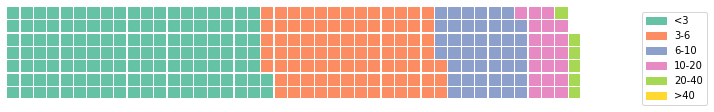

In [ ]:
from pywaffle import Waffle
# create a new column to categorize cars based on their selling prices
df['Price_Category'] = pd.cut(df['Selling_Price'], bins=[0,3,6,10,20,40,80], 
                               labels=['<3', '3-6', '6-10', '10-20', '20-40', '>40'])

# group the data by Price_Category and count the number of cars in each category
grouped_data = df.groupby('Price_Category').count()['Car_Name'].reset_index()
ax = plt.gca()
# create a waffle chart
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    values=grouped_data['Car_Name'],
    labels=list(grouped_data['Price_Category']),
    figsize=(10, 6) , # specify size of the figure
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)}
)

plt.show()

In [ ]:
!pip3 install wordcloud==1.8.1
import urllib

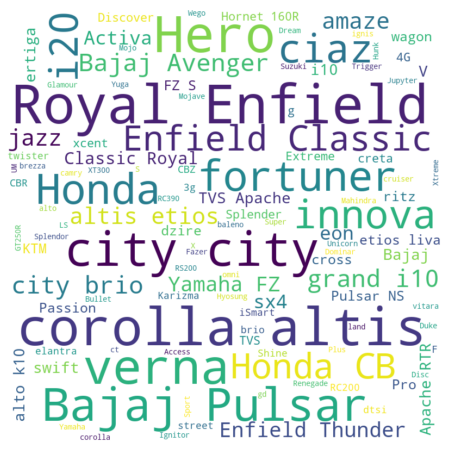

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


# concatenate all the text data into a single string
text = ' '.join(df['Car_Name'])

# create a set of stopwords
stopwords = set(STOPWORDS)

# add additional stopwords
stopwords.update(['model', 'year', 'car', 'name'])

# create a wordcloud object
wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords)

# generate wordcloud
wordcloud.generate(text)

# plot the wordcloud
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [ ]:
from PIL import Image


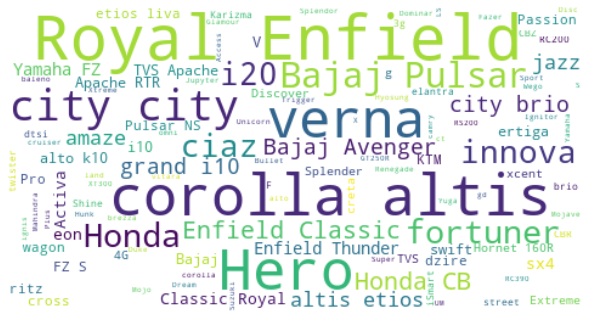

In [ ]:
# load the car mask image
car_mask = np.array(Image.open("/content/proxy.jpeg"))

# create a wordcloud object with the car mask
wordcloud = WordCloud(width = 800, height = 800, background_color ='white', stopwords = STOPWORDS, mask=car_mask).generate(text)

# plot the wordcloud with the car mask
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad = 0)

# show the plot
plt.show()

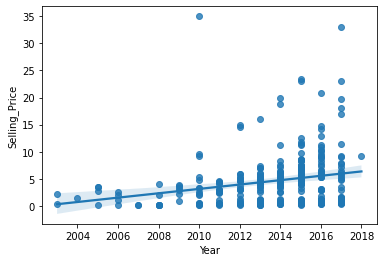

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='Year', y='Selling_Price', data=df)

plt.show()


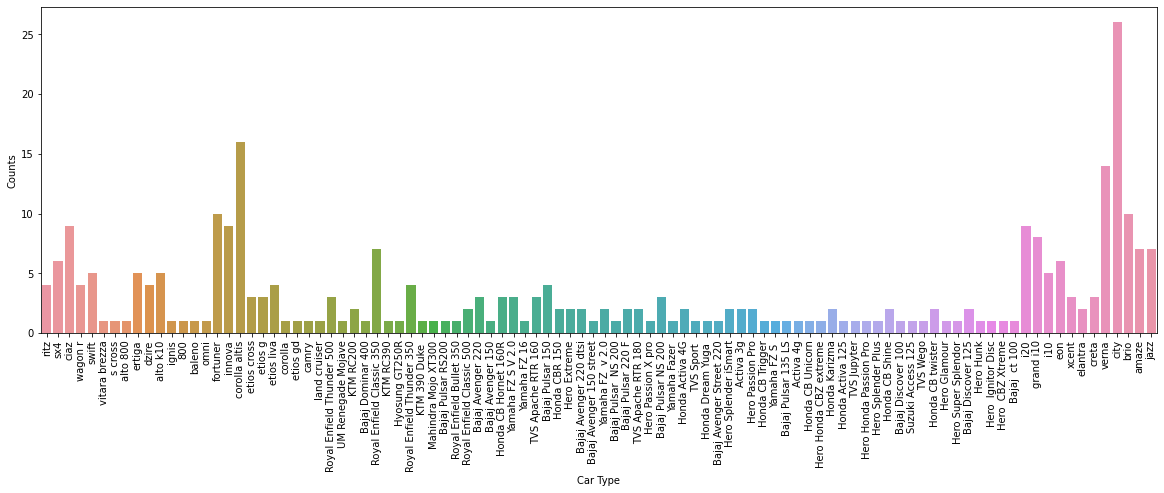

In [ ]:
plt.figure(figsize=(20,6))
sns.countplot(x=df['Car_Name'])
plt.ylabel('Counts')
plt.xlabel('Car Type')
plt.xticks(rotation = 90)
plt.show()